In [1]:
import pandas as pd
import numpy as np

### 3.Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [2]:
ratings = pd.read_csv("title_ratings.tsv", delimiter = '\t')

In [3]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1559
1,tt0000002,6.1,188
2,tt0000003,6.5,1221
3,tt0000004,6.1,114
4,tt0000005,6.1,1950


In [4]:
basics = pd.read_csv("title_basics.tsv", delimiter = '\t')
basics.head()

C:\Users\dellg7\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')

In [6]:
basics.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [7]:
year = basics[(basics['startYear'] >= 2000) & (basics['startYear'] <= 2009)] 

In [8]:
year.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
18039,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short"
34815,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
74221,tt0075779,short,Bozorgdasht-e mo'Allem,Bozorgdasht-e mo'Allem,0,2004.0,\N,20,Short
77560,tt0079204,movie,"Case #1, Case #2","Ghazieh-e Shekl-e Aval, Ghazieh-e Shekl-e Dou Wom",0,2004.0,\N,53,"Documentary,Drama"
86834,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"


In [9]:
mer = pd.merge(year, ratings, on= 'tconst')
mer.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short",6.7,27
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,75544
2,tt0075779,short,Bozorgdasht-e mo'Allem,Bozorgdasht-e mo'Allem,0,2004.0,\N,20,Short,6.5,22
3,tt0079204,movie,"Case #1, Case #2","Ghazieh-e Shekl-e Aval, Ghazieh-e Shekl-e Dou Wom",0,2004.0,\N,53,"Documentary,Drama",7.8,424
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.6,236


In [14]:
pop = mer.sort_values('numVotes', ascending = False).head(10)
pop

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
54299,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008.0,\N,152,"Action,Crime,Drama",9.0,2154048
79,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001.0,\N,178,"Adventure,Drama,Fantasy",8.8,1555602
431,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003.0,\N,201,"Adventure,Drama,Fantasy",8.9,1543755
432,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002.0,\N,179,"Adventure,Drama,Fantasy",8.7,1393344
119439,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008.0,2013,49,"Crime,Drama,Thriller",9.5,1289801
488,tt0172495,movie,Gladiator,Gladiator,0,2000.0,\N,155,"Action,Adventure,Drama",8.5,1252452
27407,tt0372784,movie,Batman Begins,Batman Begins,0,2005.0,\N,140,"Action,Adventure",8.2,1230112
24491,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0,2009.0,\N,153,"Adventure,Drama,War",8.3,1168270
36759,tt0407887,movie,The Departed,The Departed,0,2006.0,\N,151,"Crime,Drama,Thriller",8.5,1109438
58709,tt0482571,movie,The Prestige,The Prestige,0,2006.0,\N,130,"Drama,Mystery,Sci-Fi",8.5,1100338


In [11]:
from statistics import mean

In [12]:
average = mean(pop['averageRating'])

In [13]:
average

8.69

### 2. Find the year in the 1900s when the average rank increased the most, compared to the previous year.(Ignore movies with votes < 1000)

In [15]:
mer1 = pd.merge(basics, ratings, on= 'tconst')
mer1

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short",5.6,1559
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short",6.1,188
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1221
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,\N,\N,"Animation,Short",6.1,114
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short",6.1,1950
...,...,...,...,...,...,...,...,...,...,...,...
1003813,tt9916576,tvEpisode,Destinee's Story,Destinee's Story,0,2019.0,\N,85,Reality-TV,5.9,7
1003814,tt9916578,tvEpisode,The Trial of Joan Collins,The Trial of Joan Collins,0,2019.0,\N,\N,"Adventure,Biography,Comedy",9.2,12
1003815,tt9916720,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery",5.3,43
1003816,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV",6.7,11


In [16]:
table = mer1[(mer1['startYear'] >= 1900) & (mer1['startYear'] < 2000) & (mer1['numVotes'] > 1000)] 

In [17]:
table

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
262,tt0000359,short,The India Rubber Head,L'homme à la tête en caoutchouc,0,1901.0,\N,3,"Comedy,Fantasy,Short",7.1,2281
287,tt0000417,short,A Trip to the Moon,Le voyage dans la lune,0,1902.0,\N,13,"Action,Adventure,Comedy",8.2,40307
288,tt0000420,short,Alice in Wonderland,Alice in Wonderland,0,1903.0,\N,8,"Fantasy,Short",6.3,2181
296,tt0000439,short,The Great Train Robbery,The Great Train Robbery,0,1903.0,\N,11,"Action,Crime,Short",7.3,15746
301,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0,1903.0,\N,6,"Action,Short",6.4,1911
...,...,...,...,...,...,...,...,...,...,...,...
902968,tt6663784,video,Michael Jackson: Beat It,Michael Jackson: Beat It,0,1983.0,\N,5,"Crime,Music,Short",8.5,1313
902969,tt6663828,video,Michael Jackson: Smooth Criminal,Michael Jackson: Smooth Criminal,0,1988.0,\N,10,"Music,Short",8.8,1433
905570,tt6725014,movie,Scenes from a Marriage,Scener ur ett äktenskap,0,1974.0,\N,169,Drama,8.5,2372
905599,tt6725158,tvMiniSeries,Fanny and Alexander,Fanny och Alexander,0,1983.0,1983,312,Drama,9.1,2039


In [19]:
#setting index values
table['index'] = [i for i in range(0, len(table))]
table.set_index('index',inplace = True)
table

C:\Users\dellg7\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
index,,,,,,,,,,,
0,tt0000359,short,The India Rubber Head,L'homme à la tête en caoutchouc,0,1901.0,\N,3,"Comedy,Fantasy,Short",7.1,2281
1,tt0000417,short,A Trip to the Moon,Le voyage dans la lune,0,1902.0,\N,13,"Action,Adventure,Comedy",8.2,40307
2,tt0000420,short,Alice in Wonderland,Alice in Wonderland,0,1903.0,\N,8,"Fantasy,Short",6.3,2181
3,tt0000439,short,The Great Train Robbery,The Great Train Robbery,0,1903.0,\N,11,"Action,Crime,Short",7.3,15746
4,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0,1903.0,\N,6,"Action,Short",6.4,1911
...,...,...,...,...,...,...,...,...,...,...,...
16759,tt6663784,video,Michael Jackson: Beat It,Michael Jackson: Beat It,0,1983.0,\N,5,"Crime,Music,Short",8.5,1313
16760,tt6663828,video,Michael Jackson: Smooth Criminal,Michael Jackson: Smooth Criminal,0,1988.0,\N,10,"Music,Short",8.8,1433
16761,tt6725014,movie,Scenes from a Marriage,Scener ur ett äktenskap,0,1974.0,\N,169,Drama,8.5,2372


In [20]:
del table.index.name

In [21]:
table

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000359,short,The India Rubber Head,L'homme à la tête en caoutchouc,0,1901.0,\N,3,"Comedy,Fantasy,Short",7.1,2281
1,tt0000417,short,A Trip to the Moon,Le voyage dans la lune,0,1902.0,\N,13,"Action,Adventure,Comedy",8.2,40307
2,tt0000420,short,Alice in Wonderland,Alice in Wonderland,0,1903.0,\N,8,"Fantasy,Short",6.3,2181
3,tt0000439,short,The Great Train Robbery,The Great Train Robbery,0,1903.0,\N,11,"Action,Crime,Short",7.3,15746
4,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0,1903.0,\N,6,"Action,Short",6.4,1911
...,...,...,...,...,...,...,...,...,...,...,...
16759,tt6663784,video,Michael Jackson: Beat It,Michael Jackson: Beat It,0,1983.0,\N,5,"Crime,Music,Short",8.5,1313
16760,tt6663828,video,Michael Jackson: Smooth Criminal,Michael Jackson: Smooth Criminal,0,1988.0,\N,10,"Music,Short",8.8,1433
16761,tt6725014,movie,Scenes from a Marriage,Scener ur ett äktenskap,0,1974.0,\N,169,Drama,8.5,2372
16762,tt6725158,tvMiniSeries,Fanny and Alexander,Fanny och Alexander,0,1983.0,1983,312,Drama,9.1,2039


In [57]:
temp_avg = table.groupby('startYear').agg(avgrating = ("averageRating", np.mean)).reset_index()

In [62]:
max1 = 0
yr = 0
for i in range(1, len(temp_avg)):
    v1 = temp_avg.loc[i, 'avgrating']
    v2 = temp_avg.loc[i-1, 'avgrating']
    temp = abs(v2 - v1)
    if (temp > max1):
        max1 = temp
        yr = temp_avg.loc[[i], ['startYear']]
print(max1)
yr

1.9714285714285706


,startYear
3,1903.0


### 3. Find the expected average rank for 2013 using linear regression. How good is this regression? 
(Ignore movies with votes < 1000.)

In [24]:
#removing NA's in start year since we are doing linear regression
mer1 = mer1[~np.isnan(mer1.startYear)]
mer1

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short",5.6,1559
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short",6.1,188
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1221
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,\N,\N,"Animation,Short",6.1,114
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short",6.1,1950
...,...,...,...,...,...,...,...,...,...,...,...
1003813,tt9916576,tvEpisode,Destinee's Story,Destinee's Story,0,2019.0,\N,85,Reality-TV,5.9,7
1003814,tt9916578,tvEpisode,The Trial of Joan Collins,The Trial of Joan Collins,0,2019.0,\N,\N,"Adventure,Biography,Comedy",9.2,12
1003815,tt9916720,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery",5.3,43
1003816,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV",6.7,11


In [25]:
mer1.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [22]:
# mer1['startYear'] = pd.to_numeric(mer1['startYear'], downcast='signed')

C:\Users\dellg7\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
mer2 = mer1

In [37]:
mer2.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [38]:
yr = mer2.startYear.unique()
yr

array([1894., 1892., 1893., 1895., 1896., 1898., 1897., 1900., 1899.,
       1901., 1904., 1903., 1902., 1912., 1907., 1905., 1906., 1908.,
       1910., 1909., 1914., 1911., 1913., 1919., 1916., 1917., 1915.,
       1918., 1936., 1925., 1920., 1921., 1922., 1923., 1924., 1927.,
       1929., 1926., 1993., 1935., 1928., 2004., 1942., 1930., 1933.,
       1931., 1932., 1939., 1937., 1950., 1938., 1951., 1934., 1983.,
       1946., 1940., 1944., 1947., 1941., 1952., 1970., 1957., 1943.,
       1948., 1945., 1959., 2001., 1949., 1953., 1954., 1965., 1973.,
       1995., 1955., 1962., 1958., 1956., 1960., 1961., 1964., 1967.,
       1963., 1969., 1968., 1971., 1972., 1966., 1976., 1990., 2019.,
       1979., 1987., 1974., 1981., 1988., 1978., 1977., 1989., 1975.,
       1986., 1985., 1980., 2010., 2018., 1984., 1982., 1992., 1991.,
       1999., 2005., 1998., 1994., 2002., 1997., 1996., 2017., 2000.,
       2009., 2008., 2003., 2007., 2006., 2016., 2013., 2011., 1891.,
       2012., 2015.,

In [39]:
print(min(yr))
print(max(yr))

1874.0
2020.0


In [40]:
mer2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short",5.6,1559
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short",6.1,188
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1221
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,\N,\N,"Animation,Short",6.1,114
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short",6.1,1950
...,...,...,...,...,...,...,...,...,...,...,...
1003674,tt9916576,tvEpisode,Destinee's Story,Destinee's Story,0,2019.0,\N,85,Reality-TV,5.9,7
1003675,tt9916578,tvEpisode,The Trial of Joan Collins,The Trial of Joan Collins,0,2019.0,\N,\N,"Adventure,Biography,Comedy",9.2,12
1003676,tt9916720,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery",5.3,43
1003677,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV",6.7,11


In [41]:
mer2 = mer2[~np.isnan(mer2.averageRating)]

In [43]:
finaldict = {}
for i in range(1874,2020):
    finaldict[i] = []
l = list()
for j in range(len(mer2)):
    v3 = int(mer2.loc[j, 'startYear'])
    rate = mer2.loc[j, 'averageRating']
    try:
        l = finaldict.get(v3)
        l.append(rate)
        finaldict[v3]= l
    except AttributeError:
        pass
#     finaldict.get(v3).append(rate)
print(finaldict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
for key in finaldict:
    if(finaldict.get(key) == []):
        finaldict.get(key).append(0) 

In [45]:
print(finaldict)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
for key in finaldict:
    lists = finaldict.get(key)
    meanvalue = sum(lists) / len(lists)
    finaldict[key] = meanvalue


In [48]:
print(finaldict)

{1874: 6.9, 1875: 0.0, 1876: 0.0, 1877: 0.0, 1878: 7.4, 1879: 0.0, 1880: 0.0, 1881: 5.2, 1882: 0.0, 1883: 6.4, 1884: 0.0, 1885: 5.2, 1886: 0.0, 1887: 4.688888888888889, 1888: 6.220000000000001, 1889: 5.4, 1890: 5.183333333333334, 1891: 4.89, 1892: 5.344444444444444, 1893: 4.866666666666666, 1894: 4.894845360824741, 1895: 4.936206896551725, 1896: 4.8283185840708, 1897: 4.64014184397163, 1898: 4.681791907514451, 1899: 5.067330677290835, 1900: 5.2586080586080595, 1901: 5.316740088105731, 1902: 5.319796954314717, 1903: 5.131835205992512, 1904: 5.209333333333333, 1905: 5.299999999999999, 1906: 5.294999999999999, 1907: 5.580104712041884, 1908: 5.513620071684583, 1909: 5.222929936305731, 1910: 5.329682997118158, 1911: 5.345329670329668, 1912: 5.380400000000008, 1913: 5.508201058201057, 1914: 5.763112391930833, 1915: 5.794835680751175, 1916: 5.8185863874345545, 1917: 5.828608923884511, 1918: 5.914714714714714, 1919: 5.904749340369395, 1920: 5.8451690821256115, 1921: 6.034146341463415, 1922: 5.

In [49]:
import csv
with open('regression.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year", "Average"])
    for key in finaldict:
        writer.writerow([key, finaldict.get(key)])

In [50]:
data = pd.read_csv("regression.csv")

In [51]:
data

,Year,Average
0,1874,6.900000
1,1875,0.000000
2,1876,0.000000
3,1877,0.000000
4,1878,7.400000
...,...,...
141,2015,7.082936
142,2016,7.126522
143,2017,7.164966
144,2018,7.168033


In [52]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [53]:
X = data['Year'].values.reshape(-1,1)
Y = data['Average'].values.reshape(-1,1)
model = LinearRegression().fit(X,Y)

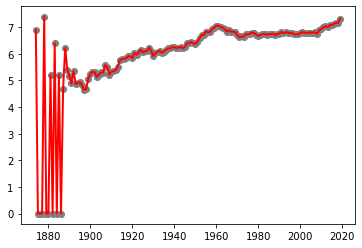

In [54]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y, color='red', linewidth=2)
plt.show()

In [ ]:
#2013	7.008923

In [55]:
x_test = np.array([2013]).reshape(-1, 1)
pred = model.predict(x_test)
print(pred)

[[7.60046937]]


In [56]:
error = 7.61484672-7.008923
print(error)#0.6059237199999998

0.6059237199999998


So, as the error is minimal we can consider this linear regression model for further analysis

### 6. Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?


In [48]:
mer3 = mer1[(mer1['startYear'] >= 1900) & (mer1['startYear'] < 2000)]
mer3

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
156,tt0000160,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900,\N,\N,"Drama,Short",5.8,8
216,tt0000265,short,Above the Limit,Above the Limit,0,1900,\N,\N,"Comedy,Short",4.6,93
217,tt0000269,short,"Army Life; or, How Soldiers Are Made: Mounted ...",Army Life,0,1900,\N,\N,"Documentary,Short",5.2,91
218,tt0000271,short,Arrivée de Pierette et Pierrot,Arrivée de Pierette et Pierrot,0,1900,\N,\N,Short,7.3,6
219,tt0000272,short,As Seen Through a Telescope,As Seen Through a Telescope,0,1900,\N,1,"Comedy,Short",5.6,627
...,...,...,...,...,...,...,...,...,...,...,...
1003463,tt9909498,video,Pink Floyd: Interstellar Overdrive,Pink Floyd: Interstellar Overdrive,0,1967,\N,17,"Music,Short",7.6,9
1003464,tt9909520,video,Pink Floyd: Nick's Boogie,Pink Floyd: Nick's Boogie,0,1967,\N,12,"Music,Short",7.3,6
1003476,tt9909812,video,Alice Cooper: Hey Stoopid,Alice Cooper: Hey Stoopid,0,1991,\N,5,"Music,Short",7.0,5
1003480,tt9909866,video,Nora,Nora,0,1985,\N,45,"Action,Adventure,Animation",5.4,5


In [49]:
mer3 = mer3.sort_values('startYear', ascending = True)
mer3

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
156,tt0000160,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900,\N,\N,"Drama,Short",5.8,8
167162,tt0289413,short,X Rays,Les rayons x,0,1900,\N,1,"Comedy,Short",4.7,23
167164,tt0289416,short,Red Cross Ambulance on Battlefield,Red Cross Ambulance on Battlefield,0,1900,\N,2,"Documentary,Short",4.4,45
167262,tt0289620,short,White Horse Rapids,White Horse Rapids,0,1900,\N,\N,"Documentary,Short",4.5,50
167558,tt0290125,short,Aguinaldo's Navy,Aguinaldo's Navy,0,1900,\N,1,"Documentary,Short",4.2,38
...,...,...,...,...,...,...,...,...,...,...,...
669584,tt2384376,tvEpisode,Escrever ou Digitar?,Escrever ou Digitar?,0,1999,\N,\N,"Crime,Music,News",9.8,96
97768,tt0139606,movie,Shades,Shades,0,1999,\N,93,"Comedy,Drama",5.4,495
366884,tt0776291,tvEpisode,Quiet Riot,Quiet Riot,0,1999,\N,\N,"Biography,Documentary,Music",6.5,12
126681,tt0198911,short,Pirates: 3D Show,Pirates: 3D Show,0,1999,\N,17,"Comedy,Short",5.9,324


In [50]:
mer3['index'] = [i for i in range(0, len(mer3))]
mer3.set_index('index',inplace = True)
mer3

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
index,,,,,,,,,,,
0,tt0000160,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900,\N,\N,"Drama,Short",5.8,8
1,tt0289413,short,X Rays,Les rayons x,0,1900,\N,1,"Comedy,Short",4.7,23
2,tt0289416,short,Red Cross Ambulance on Battlefield,Red Cross Ambulance on Battlefield,0,1900,\N,2,"Documentary,Short",4.4,45
3,tt0289620,short,White Horse Rapids,White Horse Rapids,0,1900,\N,\N,"Documentary,Short",4.5,50
4,tt0290125,short,Aguinaldo's Navy,Aguinaldo's Navy,0,1900,\N,1,"Documentary,Short",4.2,38
...,...,...,...,...,...,...,...,...,...,...,...
345967,tt2384376,tvEpisode,Escrever ou Digitar?,Escrever ou Digitar?,0,1999,\N,\N,"Crime,Music,News",9.8,96
345968,tt0139606,movie,Shades,Shades,0,1999,\N,93,"Comedy,Drama",5.4,495
345969,tt0776291,tvEpisode,Quiet Riot,Quiet Riot,0,1999,\N,\N,"Biography,Documentary,Music",6.5,12


In [51]:
del mer3.index.name

In [52]:
mer3

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000160,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900,\N,\N,"Drama,Short",5.8,8
1,tt0289413,short,X Rays,Les rayons x,0,1900,\N,1,"Comedy,Short",4.7,23
2,tt0289416,short,Red Cross Ambulance on Battlefield,Red Cross Ambulance on Battlefield,0,1900,\N,2,"Documentary,Short",4.4,45
3,tt0289620,short,White Horse Rapids,White Horse Rapids,0,1900,\N,\N,"Documentary,Short",4.5,50
4,tt0290125,short,Aguinaldo's Navy,Aguinaldo's Navy,0,1900,\N,1,"Documentary,Short",4.2,38
...,...,...,...,...,...,...,...,...,...,...,...
345967,tt2384376,tvEpisode,Escrever ou Digitar?,Escrever ou Digitar?,0,1999,\N,\N,"Crime,Music,News",9.8,96
345968,tt0139606,movie,Shades,Shades,0,1999,\N,93,"Comedy,Drama",5.4,495
345969,tt0776291,tvEpisode,Quiet Riot,Quiet Riot,0,1999,\N,\N,"Biography,Documentary,Music",6.5,12
345970,tt0198911,short,Pirates: 3D Show,Pirates: 3D Show,0,1999,\N,17,"Comedy,Short",5.9,324


In [53]:
mer3['startYear'] = pd.to_numeric(mer3['startYear'], errors='coerce')
mer3['numVotes'] = pd.to_numeric(mer3['numVotes'], errors='coerce')

In [54]:
mer3.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear           int16
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [55]:
mer3['averageRating'].corr(mer3['numVotes'])
np.corrcoef(mer3['averageRating'], mer3['numVotes'])

array([[1.        , 0.02839006],
       [0.02839006, 1.        ]])

In [65]:
corrdict1 = {}
corrdict2 = {}

for i in range(1900,2000):
    corrdict1[i] = []
    corrdict2[i] = []
l1 = list()
l2 = list()
for j in range(0,345692):
    v3 = int(mer3.loc[j, 'startYear'])
    rate = mer3.loc[j, 'averageRating']
    votes = mer3.loc[j,'numVotes']
    try:
        l1 = corrdict1.get(v3)
        l1.append(rate)
        corrdict1[v3]= l1
        
        l2 = corrdict2.get(v3)
        l2.append(votes)
        corrdict2[v3]= l2
        
    except AttributeError:
        pass
print(corrdict1)
print("================================================================================================================")
print(corrdict2)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
for key in corrdict1:
    rating_list = corrdict1.get(key)
    rating_sum = sum(rating_list)
    corrdict1[key] = rating_sum

print(corrdict1)

{1900: 1435.6000000000001, 1901: 1206.9, 1902: 1047.9999999999998, 1903: 1370.1999999999996, 1904: 1172.1000000000017, 1905: 1049.4000000000008, 1906: 1059.0000000000005, 1907: 1065.7999999999997, 1908: 1538.299999999999, 1909: 1640.0, 1910: 1849.4000000000008, 1911: 1945.7000000000003, 1912: 2690.2000000000035, 1913: 2082.099999999999, 1914: 1999.7999999999975, 1915: 2468.6, 1916: 2222.6999999999975, 1917: 2220.6999999999985, 1918: 1969.6000000000001, 1919: 2237.9000000000005, 1920: 2419.9000000000015, 1921: 2474.000000000001, 1922: 2309.7, 1923: 2535.399999999996, 1924: 2765.999999999999, 1925: 3512.4999999999986, 1926: 3879.999999999999, 1927: 3977.4999999999945, 1928: 4376.599999999998, 1929: 4591.600000000001, 1930: 5415.099999999992, 1931: 6185.2, 1932: 6832.599999999999, 1933: 6846.700000000011, 1934: 7616.7000000000035, 1935: 7947.500000000005, 1936: 8365.500000000002, 1937: 8409.399999999996, 1938: 8447.899999999992, 1939: 8007.499999999994, 1940: 7956.899999999994, 1941: 8031

In [58]:
for key in corrdict2:
    votes_list = corrdict2.get(key)
    votes_sum = sum(votes_list)
    corrdict2[key] = votes_sum

print(corrdict2)

{1900: 25594, 1901: 25697, 1902: 51205, 1903: 45429, 1904: 18340, 1905: 16998, 1906: 18200, 1907: 15725, 1908: 17190, 1909: 18030, 1910: 18003, 1911: 15414, 1912: 27633, 1913: 24415, 1914: 60159, 1915: 68885, 1916: 56595, 1917: 42782, 1918: 41928, 1919: 58940, 1920: 117779, 1921: 179104, 1922: 167234, 1923: 77424, 1924: 128096, 1925: 245121, 1926: 158297, 1927: 321379, 1928: 216134, 1929: 207817, 1930: 236633, 1931: 631305, 1932: 415406, 1933: 449717, 1934: 386750, 1935: 424013, 1936: 586376, 1937: 533722, 1938: 457723, 1939: 1214537, 1940: 1084916, 1941: 1101071, 1942: 1120490, 1943: 438775, 1944: 670226, 1945: 516684, 1946: 1068518, 1947: 517627, 1948: 909069, 1949: 732403, 1950: 1137954, 1951: 1034941, 1952: 887788, 1953: 1157745, 1954: 1733150, 1955: 1257473, 1956: 1068270, 1957: 2135379, 1958: 1258777, 1959: 1915589, 1960: 2049904, 1961: 1483384, 1962: 1998406, 1963: 1761313, 1964: 2206897, 1965: 1653690, 1966: 2287035, 1967: 2133010, 1968: 2648493, 1969: 1716467, 1970: 1507728, 1

In [59]:
#mer3['averageRating'].corr(mer3['numVotes'])
corrdict = {}
ranksList = list()
votesList= list()
for key in corrdict1:
    value1 = corrdict1.get(key)
    value2 = corrdict2.get(key)
    ranksList.append(value1)
    votesList.append(value2)
#         corrdict[key] =np.correlate(np.linspace(value1), np.linspace(value2))
#     except AttributeError:
#         pass
# print(ranksList)
# print(votesList)
newDict = dict()
# for key in corrdict1:
#     newDict[key] = [np.corrcoef(ranksList[i], votesList[j]) for i in range(len(ranksList)) for j in range(i+1)]
# newDict




In [60]:
with open('correlation.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year", "Ratings","Votes"])
    for key in corrdict1:
        writer.writerow([key, corrdict1.get(key), corrdict2.get(key)])
    

In [61]:
corr_data = pd.read_csv("correlation.csv")
corr_data.head()

,Year,Ratings,Votes
0,1900,1435.6,25594
1,1901,1206.9,25697
2,1902,1048.0,51205
3,1903,1370.2,45429
4,1904,1172.1,18340


In [62]:
print(corr_data['Votes'])
print(corr_data['Ratings'])

0        25594
1        25697
2        51205
3        45429
4        18340
        ...   
95    15834205
96    12275470
97    17690541
98    18082761
99    22825558
Name: Votes, Length: 100, dtype: int64
0       1435.6
1       1206.9
2       1048.0
3       1370.2
4       1172.1
        ...   
95     75550.2
96     82032.1
97     89157.4
98     95170.0
99    100382.5
Name: Ratings, Length: 100, dtype: float64


In [63]:
p1 = []
p2 = []
for each in range (1, len(corr_data)):
    if(corr_data.loc[each, 'Year'] >=1900 & corr_data.loc[each, 'Year']<2000):
        p1.append(corr_data.loc[each, 'Ratings'])
        p2.append(corr_data.loc[each, 'Votes'])

# print(p1.corr(p2))
np.corrcoef(p1,p2)
# corr(p1,p2)

array([[1.        , 0.92866859],
       [0.92866859, 1.        ]])